## Arbitrary value imputation for categorical variables

This is **the most widely used method** of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'. This is in essence, **the equivalent of replacing by an arbitrary value for numerical variables**. It is very well suited when the **number of missing data is high

It is easy to implement, fast, can be integrated in production (during model deployment). It captures the importance of "missingness" if there is one.No assumption made on the data! If the number of NA is small, creating an additional category may cause trees to over-fit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### House Prices dataset

In [3]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']
data = pd.read_csv('C:\\Users\\husey\\Desktop\\python\\udemy\\6.FeatureEngineeringForML\\HousingPrices_train.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [4]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle **we could do this in the original dataset** and **then separate** into train and test. **However**, I do not recommend this practice. You will see in later notebooks that **splitting into train and test right at the beginning** helps with **building a machine learning pipeline**. So I will continue with this practice here as well.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [6]:
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

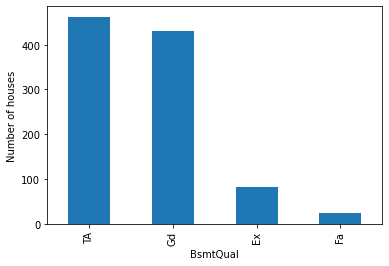

In [7]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [8]:
X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

C:\Users\husey\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0, 0.5, 'Number of houses')

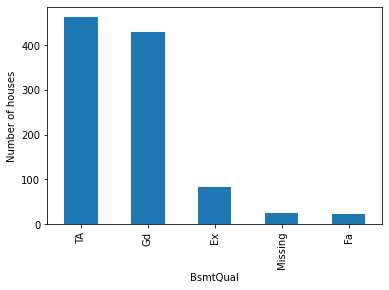

In [9]:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

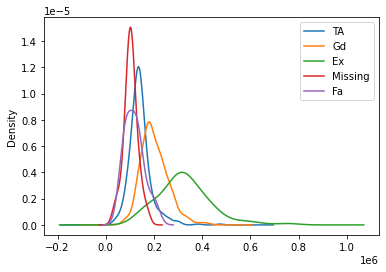

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of Prices. For example the houses with the label Ex tend to be the most expensive, whereas the houses that show Missing or Fa are the cheapest.

#### FirePlaceQu

In [11]:
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

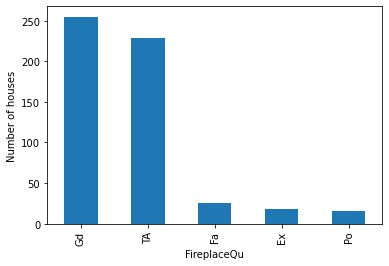

In [12]:
X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [13]:
X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

C:\Users\husey\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0, 0.5, 'Number of houses')

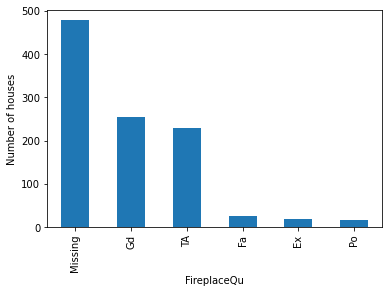

In [14]:
X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

This label contains most of the houses, as most showed missing data originally.

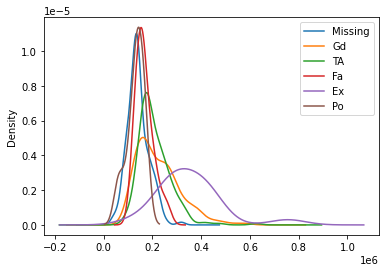

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

We observe again that the houses with different labels for FirePlaceQu also show different distributions of SalePrice, with those showing Ex being the most expensive ones and those showing Missing, or Fa being the cheapest ones.

**That is all for this demonstration. In later notebooks I will show you how to automate this with scikit=learn and feature engine**

In [16]:
# BONUS: for your analysis: here is a way of making it more general
def automate_plot(df, variable, target):    
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')    
    plt.show()        

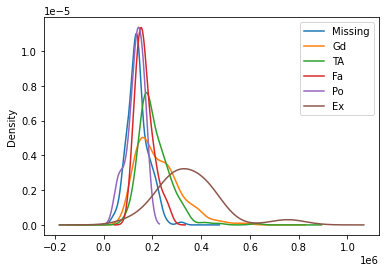

In [16]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

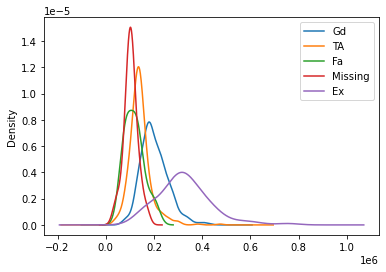

In [17]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')